<a href="https://colab.research.google.com/github/BenWilop/WSG_games/blob/main/playground_WSG_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import dotenv
import wandb
import os

dotenv.load_dotenv(os.path.join("/homes/55/bwilop/wsg/private/", "vscode-ssh.env"))
api_key = os.getenv("WANDB_API_KEY")
wandb.login(key=api_key)

data_folder = "/homes/55/bwilop/wsg/data/"
experiment_folder = "/homes/55/bwilop/wsg/experiments/"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /homes/55/bwilop/.netrc
wandb: Currently logged in as: benwilop (benwilop-rwth-aachen-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
%load_ext autoreload
%autoreload 2
import torch as t
from torch.nn.functional import cross_entropy, softmax

# from jaxtyping import Float
import matplotlib.pyplot as plt

from wsg_games.tictactoe.evals import *
from wsg_games.tictactoe.data import *
from wsg_games.tictactoe.game import *
from wsg_games.tictactoe.vibe_coding.calculate_leakage_percentage_modified_game import *

from wsg_games.tictactoe.analysis.analyse_data import *
from wsg_games.tictactoe.analysis.visualize_game import *

from wsg_games.tictactoe.train.create_models import *
from wsg_games.tictactoe.train.save_load_models import *
from wsg_games.tictactoe.train.train import *
from wsg_games.tictactoe.train.finetune import *
from wsg_games.tictactoe.train.pretrain import *

DEVICE = t.device("cuda" if t.cuda.is_available() else "cpu")
print(DEVICE)

cuda


# Data

In [ ]:
# tictactoe_data = cache_tictactoe_data(data_folder + 'tictactoe_data.pkl', DEVICE)
# tictactoe_data = cache_tictactoe_data_random(data_folder + 'tictactoe_data_random_STRONG_RULE_REVERSE_RULE.pkl', DEVICE)
# tictactoe_data = cache_tictactoe_data_random(
#     data_folder + "tictactoe_data_random_STRONG_RULE_NO_DIAGONAL.pkl", DEVICE
# )
tictactoe_data = cache_tictactoe_data_random(
    data_folder + "tictactoe_data_first_stone_random_no_diagonal_1000000.pkl", DEVICE
)
print_data_statistics(tictactoe_data)

Generating random games:   0%|          | 0/200000 [00:00<?, ?it/s]

Labeling games: 100%|██████████| 200000/200000 [05:55<00:00, 563.13it/s]


Shape Data:    torch.Size([200000, 10])
Shape Random:  torch.Size([200000, 10, 10])
Shape Weak:    torch.Size([200000, 10, 10])
Shape Strong:  torch.Size([200000, 10, 10])
--------------------------------------------------------
Evals Random:  {'weak_accuracy': 0.6285012364387512, 'strong_accuracy': 0.6188480854034424, 'illegal_move_chance': 0.0}
Evals Weak:    {'weak_accuracy': 1.0, 'strong_accuracy': 0.7394366264343262, 'illegal_move_chance': 0.0}
Evals Strong:  {'weak_accuracy': 0.8004831671714783, 'strong_accuracy': 1.0, 'illegal_move_chance': 0.0}
--------------------------------------------------------
Entropy Random:  0.9851903915405273
Entropy Weak:    0.30451953411102295
Entropy Strong:  0.28467100858688354
--------------------------------------------------------


In [4]:
# tictactoe_train_data, weak_finetune_data, tictactoe_val_data, tictactoe_test_data = train_test_split_tictactoe(tictactoe_data, 0.5, 0.25, 0.05, 0.20, DEVICE, 1234)
(
    tictactoe_train_data,
    tictactoe_weak_finetune_data,
    tictactoe_val_data,
    tictactoe_test_data,
) = train_test_split_tictactoe_first_two_moves_no_overlap(
    tictactoe_data, 42, 15, 5, 10, 1234
)

print("Shape Train: ", tictactoe_train_data.games_data.shape)
print("Shape Weak Finetune: ", tictactoe_weak_finetune_data.games_data.shape)
print("Shape Validation: ", tictactoe_val_data.games_data.shape)
print("Shape Test:  ", tictactoe_test_data.games_data.shape)

Shape Train:  torch.Size([116885, 10])
Shape Weak Finetune:  torch.Size([41504, 10])
Shape Validation:  torch.Size([13855, 10])
Shape Test:   torch.Size([27756, 10])


In [5]:
# leakage_pct = calculate_leakage_percentage(
#     tictactoe_train_data, tictactoe_test_data, ordered_moves=False
# )
# print(f"Leakage Percentage: {leakage_pct:.2f}%")
# leakage_pct = calculate_leakage_percentage(
#     tictactoe_train_data, tictactoe_test_data, ordered_moves=True
# )
# print(f"Leakage Percentage if order is ignored: {leakage_pct:.2f}%")

In [6]:
# leakage_pct_actual_games, leakage_pct = calculate_leakage_percentage_modified(
#     tictactoe_train_data, tictactoe_test_data, check_diagonal_bonus=True
# )
# print(
#     f"Leakage Percentage Weak Rule (No-diagonals): {leakage_pct_actual_games:.2f}% and {leakage_pct:.2f}%"
# )
# leakage_pct_actual_games, leakage_pct = calculate_leakage_percentage_modified(
#     tictactoe_train_data, tictactoe_test_data, check_diagonal_bonus=False
# )
# print(
#     f"Leakage Percentage Strong Rule (With-diagonals): {leakage_pct_actual_games:.2f}% and {leakage_pct:.2f}%"
# )

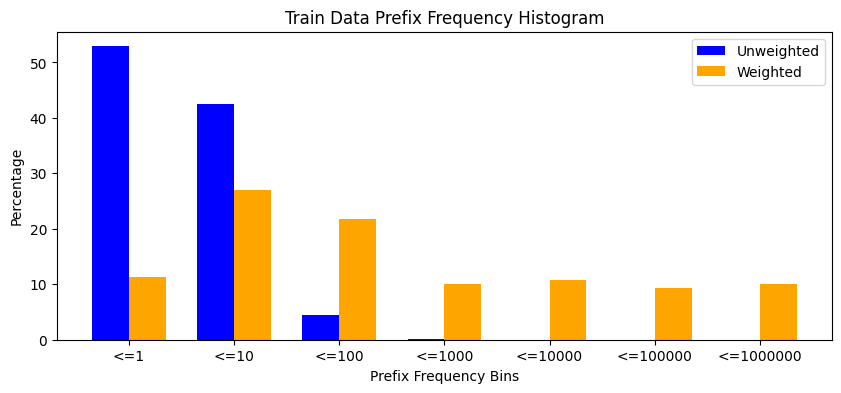

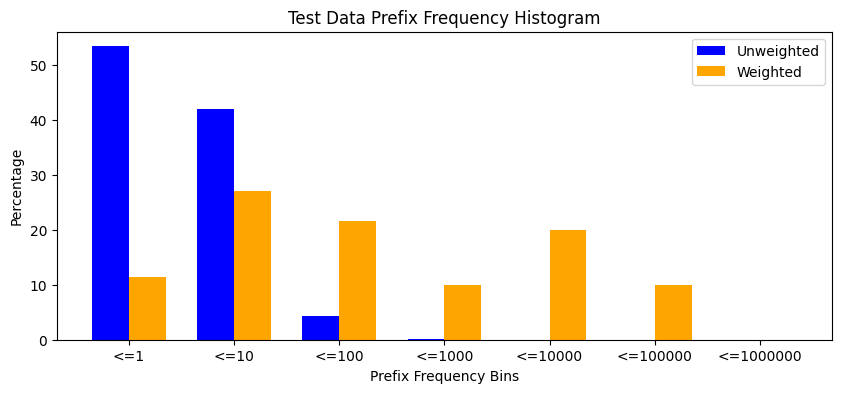

In [ ]:
# plot_train_test_prefix_histograms(tictactoe_train_data, tictactoe_test_data)

In [8]:
tictactoe_train_data = create_hard_label_tictactoe_data(
    tictactoe_train_data, num_samples=1, seed=1234
)
tictactoe_weak_finetune_data = create_hard_label_tictactoe_data(
    tictactoe_weak_finetune_data, num_samples=1, seed=1234
)
tictactoe_val_data = create_hard_label_tictactoe_data(
    tictactoe_val_data, num_samples=1, seed=1234
)

In [9]:
print("Shape Train: ", tictactoe_train_data.games_data.shape)
tictactoe_train_data.weak_goals_labels[0][:3]

Shape Train:  torch.Size([116885, 10])


tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], device='cuda:0')

In [10]:
print("Shape Weak Finetune: ", tictactoe_weak_finetune_data.games_data.shape)
tictactoe_weak_finetune_data.weak_goals_labels[0][:3]

Shape Weak Finetune:  torch.Size([41504, 10])


tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], device='cuda:0')

In [11]:
print("Shape Val: ", tictactoe_val_data.games_data.shape)
tictactoe_val_data.weak_goals_labels[0][:3]

Shape Val:  torch.Size([13855, 10])


tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], device='cuda:0')

In [12]:
print("Shape Test:  ", tictactoe_test_data.games_data.shape)
tictactoe_test_data.weak_goals_labels[0][:3]

Shape Test:   torch.Size([27756, 10])


tensor([[0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111,
         0.0000],
        [0.2500, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.2500,
         0.0000],
        [0.1667, 0.0000, 0.1667, 0.1667, 0.0000, 0.1667, 0.1667, 0.0000, 0.1667,
         0.0000]], device='cuda:0')

# Train model

In [13]:
# raise Exception()

### Parameters

In [14]:
training_cfg = get_training_cfg()
model_sizes = get_model_sizes()
print_model_ratios(model_sizes, get_model_config)

Moving model to device:  cuda
nano 6.8 * 10^01
Moving model to device:  cuda
micro 3.9 * 10^02
Moving model to device:  cuda
mini 2.0 * 10^03
Moving model to device:  cuda
small 1.0 * 10^04
Moving model to device:  cuda
medium 5.2 * 10^04
Moving model to device:  cuda
large 2.5 * 10^05
Moving model to device:  cuda
huge 1.2 * 10^06
Ratio of consecutive model-sizes:  [5.676470588235294, 5.227979274611399, 5.142715559960357, 4.9992291385623435, 4.857985428472302, 4.736774029725204]


### wandb

### Train loop

In [15]:
from wsg_games.tictactoe.evals import *
from wsg_games.tictactoe.data import *
from wsg_games.tictactoe.game import *

from wsg_games.tictactoe.analysis.analyse_data import *
from wsg_games.tictactoe.analysis.visualize_game import *

from wsg_games.tictactoe.train.create_models import *
from wsg_games.tictactoe.train.save_load_models import *
from wsg_games.tictactoe.train.train import *
from wsg_games.tictactoe.train.finetune import *
from wsg_games.tictactoe.train.pretrain import *

In [16]:
project_name = "tictactoe_playground"
model_size = "huge"
model_cfg = get_model_config(model_size)
wandb.finish()
model, _, _ = run_full_training(
    project_name,
    model_size,
    Goal.WEAK_GOAL,
    tictactoe_train_data,
    tictactoe_val_data,
    tictactoe_test_data,
    training_cfg,
    model_cfg,
)

Moving model to device:  cuda


Training epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1827 [00:00<?, ?it/s]

Early stopping triggered at epoch 9


generative/_check_if_illegal_moves,█▃▂▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
generative/_check_played_after_game_ends,▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
generative/_check_played_repeat_moves,█▃▁▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
generative/inappropriate_end_state,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test/illegal_move_chance,█▇▅▅▆▄▄▅▅▃▃▃▃▅▄▂▃▂▃▅▃▂▂▁▂▂▃▂▂▂▁▄▂▂▄▁▁▁▁▂
test/random_loss,▁▂▂▂▃▂▃▃▃▃▄▄▄▅▅▅▅▅▆▅▆▆▇▆▆▇▇▇▇▆▇▇▇▇▇█▇███
test/strong_accuracy,▁▂▃▃▃▅▃▅▃▆▄▅▄▆▅▃▆▃▇█▅▅▅▆▆█▇▇▇▅▇▇▇▆█▆▇▆█▆
test/strong_loss,▂▁▂▂▂▃▃▃▄▄▅▄▆▅▅▅▆▅▆▅▅▇▆▇▇▇▇▇█▇█▇██▇█▇▇▇▇
test/weak_accuracy,▁▃▃▄▃▁▄▄▂▆▁▄▅▃▄▃▃▆▅▆▆▄▅▅▅▅▆▆▅▆▆▇█▆▆▄▇▆▄▆
test/weak_loss,█▂▃▂▂▁▂▂▂▁▁▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁
train/illegal_move_chance,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [17]:
raise Exception()

Exception: 

### Experiments

In [ ]:
# project_name = "tictactoe_pretrained_reverse_rule_no_overlap_split_start_third_200k"
# project_name = "tictactoe_pretrained_forbidden_diagonals_no_overlap_split_start_third_200k"
# pretrain_models(experiment_folder, project_name, tictactoe_train_data, tictactoe_val_data, tictactoe_test_data, training_cfg, get_model_config)

In [ ]:
# project_name = "tictactoe_pretrain_forbidden_diagonal_rule_test2"
project_name = "tictactoe/tictactoe_pretraining"
# project_name = "tictactoe/tictactoe_pretraining_random"
# plot_loss_pretrain_models(
#     data_folder + "tictactoe/",
#     experiment_folder,
#     project_name,
#     device=DEVICE,
#     indices=[0],
# )

In [ ]:
# project_name = "tictactoe_pretrained_reverse_rule_no_overlap_split_start_third_200k"
# weak_model_weak_goals = load_model(project_name, "mini", Goal.WEAK_GOAL, experiment_folder)
# strong_model_weak_goals = load_model(project_name, "medium", Goal.WEAK_GOAL, experiment_folder)
# strong_model_strong_goals = load_model(project_name, "medium", Goal.STRONG_GOAL, experiment_folder)
# quick_evaluation("Weak model weak goal", weak_model_weak_goals, tictactoe_test_data)
# quick_evaluation("Strong model weak goal", strong_model_weak_goals, tictactoe_test_data)
# quick_evaluation("Strong model strong goal", strong_model_strong_goals, tictactoe_test_data)
# strong_model_finetuned = deepcopy(strong_model_strong_goals)

# project_name = "tictactoe_playground"
# timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M")
# experiment_name = f"experiment_finetuning_{timestamp}"
#  # Use validation data as weak_train_data
# finetune_strong_with_weak(project_name, experiment_name, weak_model_weak_goals, strong_model_finetuned, tictactoe_weak_finetune_data, tictactoe_test_data, adapted_training_cfg)

In [ ]:
# pretrained_project_name_weak = "tictactoe/tictactoe_pretraining"
# pretrained_project_name_strong = "tictactoe/tictactoe_pretraining"
# finetuned_project_name = "tictactoe/tictactoe_finetuning_use_best_val_step4"
# # finetuned_project_name = "tictactoe/tictactoe_finetuning4"

pretrained_project_name_weak = "tictactoe/tictactoe_pretraining"
pretrained_project_name_strong = "tictactoe/tictactoe_pretraining_random"
finetuned_project_name = "tictactoe/tictactoe_finetuning_use_best_val_step_random4"
# finetuned_project_name = "tictactoe/tictactoe_finetuning_random4"

# plot_wsg_gap_finetuned_models(
#     data_folder + "tictactoe/",
#     experiment_folder,
#     pretrained_project_name_weak,
#     pretrained_project_name_strong,
#     finetuned_project_name,
#     device=DEVICE,
#     indices=[0],
#     aggregate_data=False,
# )

In [ ]:
import os
import torch as t


# Helper: compute loss on test data
def get_weak_loss(model, test_data: TicTacToeData, n_samples: int = 20000) -> float:
    model.eval()
    with t.no_grad():
        sample = random_sample_tictactoe_data(test_data, n_samples)
        logits = model(sample.games_data)
        loss = cross_entropy(
            rearrange(logits), rearrange(sample.weak_goals_labels)
        ).item()
    return loss


def visualize_finetuning_results(
    pretrained_project_name: str,
    finetuned_project_name: str,
    experiment_folder: str,
    test_data: TicTacToeData,
    model_sizes: list,
    device: t.device,
    index: int | None,
):
    """
    For each weak_size and for every strong_size larger than weak_size,
    compute the recovered percentage:

        recovered % = (L_weak - L_model) / (L_weak - L_strong_baseline) * 100

    where:
      - L_weak: loss of the weak model (evaluated on weak_goals)
      - L_strong_baseline: loss of the pretrained strong model on the weak goal
      - L_model: loss of either the pretrained strong model (for the left plot) or the finetuned model (for the right plot)

    The x-axis is the number of parameters in the strong model (log-scaled).
    One line is drawn per weak model size, connecting datapoints for each strong size.
    Two subplots are created: left for pretrained models and right for finetuned models.
    """
    data_pretrained = {}  # { weak_size: list of (num_params, recovered %) }
    data_finetuned = {}

    for weak_size in model_sizes:
        weak_model = load_model(
            pretrained_project_name,
            weak_size,
            Goal.WEAK_GOAL,
            experiment_folder,
            device=device,
            index=index,
        )
        if not weak_model:
            print(f"Weak model of size {weak_size} not found, skipping.")
            continue

        # Get loss of weak model (using weak labels)
        L_weak = get_weak_loss(weak_model, test_data)
        data_pretrained[weak_size] = []
        data_finetuned[weak_size] = []

        for strong_size in model_sizes:
            if model_sizes.index(strong_size) <= model_sizes.index(weak_size):
                continue

            strong_model_weak_goal = load_model(
                pretrained_project_name,
                strong_size,
                Goal.WEAK_GOAL,
                experiment_folder,
                device=device,
                index=index,
            )
            strong_model_strong_goal = load_model(
                pretrained_project_name,
                strong_size,
                Goal.STRONG_GOAL,
                experiment_folder,
                device=device,
                index=index,
            )
            if not strong_model_weak_goal or not strong_model_strong_goal:
                print(f"Strong models of size {strong_size} not found, skipping.")
                continue

            num_params = count_parameters(strong_model_weak_goal)
            L_strong_baseline = get_weak_loss(strong_model_weak_goal, test_data)
            L_strong_pretrained_on_weak_goal = get_weak_loss(
                strong_model_strong_goal, test_data
            )

            # Left plot
            recovered_pretrained = (
                (L_weak - L_strong_pretrained_on_weak_goal)
                / (L_weak - L_strong_baseline)
                * 100
            )

            # Right plot
            finetuned_model = load_finetuned_model(
                finetuned_project_name,
                weak_size,
                strong_size,
                experiment_folder,
                device=device,
                index=index,
            )
            if not finetuned_model:
                print(f"Finetuned model of size {strong_size} not found, skipping.")
                continue

            L_finetuned = get_weak_loss(finetuned_model, test_data)
            recovered_finetuned = (
                (L_weak - L_finetuned) / (L_weak - L_strong_baseline) * 100
            )

            data_pretrained[weak_size].append((num_params, recovered_pretrained))
            data_finetuned[weak_size].append((num_params, recovered_finetuned))

    # Create two subplots: left for pretrained, right for finetuned.
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot pretrained data.
    for weak_size, points in data_pretrained.items():
        if points:
            points.sort(key=lambda x: x[0])
            x_vals = [p[0] for p in points]
            y_vals = [p[1] for p in points]
            axes[0].plot(x_vals, y_vals, marker="o", label=f"Weak {weak_size}")
    axes[0].set_xscale("log")
    axes[0].set_xlabel("Number of Parameters (log scale)")
    axes[0].set_ylabel("Recovered %")
    axes[0].set_title("Pretrained Models")
    axes[0].legend()
    axes[0].grid(True, which="both", ls="--")

    # Plot finetuned data.
    for weak_size, points in data_finetuned.items():
        if points:
            points.sort(key=lambda x: x[0])
            x_vals = [p[0] for p in points]
            y_vals = [p[1] for p in points]
            axes[1].plot(x_vals, y_vals, marker="o", label=f"Weak {weak_size}")
    axes[1].set_xscale("log")
    axes[1].set_xlabel("Number of Parameters (log scale)")
    axes[1].set_ylabel("Recovered %")
    axes[1].set_title("Finetuned Models")
    axes[1].legend()
    axes[1].grid(True, which="both", ls="--")

    axes[0].set_yscale("symlog", linthresh=1)
    axes[1].set_yscale("symlog", linthresh=1)
    axes[0].axhline(0, color="black", linestyle=":")
    axes[1].axhline(0, color="black", linestyle=":")

    plt.tight_layout()
    plt.show()


pretrained_project_name = "tictactoe/tictactoe_pretraining"
finetuned_project_name = "tictactoe/tictactoe_finetuning"
# pretrained_project_name = "tictactoe_pretrained_forbidden_diagonals_no_overlap_split_start_third_200k"
# finetuned_project_name = "finetune_sweep_test_parallel_early_top_20"
# visualize_finetuning_results(
#     pretrained_project_name,
#     finetuned_project_name,
#     experiment_folder,
#     tictactoe_test_data,
#     ["nano", "micro", "mini", "small", "medium", "large", "huge"],
#     device=DEVICE,
#     index=1,
# )

In [ ]:
raise Exception()

Exception: 

# Inspect model

In [ ]:
project_name = "tictactoe/tictactoe_pretraining5"
model = load_model(
    project_name, "huge", Goal.WEAK_GOAL, experiment_folder, device=DEVICE, index=0
)
quick_evaluation("model weak goal", model, tictactoe_test_data)

experiment_folder:  /homes/55/bwilop/wsg/experiments/
project_name:  tictactoe/tictactoe_pretraining5
/homes/55/bwilop/wsg/experiments/tictactoe/tictactoe_pretraining5
Loading model from /homes/55/bwilop/wsg/experiments/tictactoe/tictactoe_pretraining5/experiment_0_huge_weak_2025-05-16-16-00_dqzr4vel.pkl
Moving model to device:  cuda
model weak goal
weak_loss:  0.5160764455795288
strong_loss:  2.21260929107666


(0.5160764455795288, 2.21260929107666)

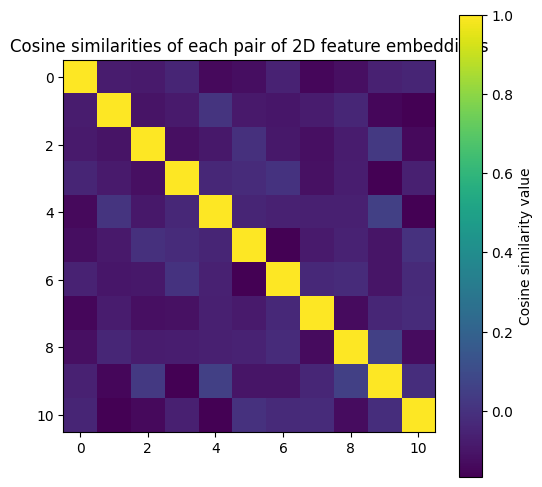

In [ ]:
W = model.embed.W_E
W_normed = W / W.norm(dim=1, keepdim=True)

# Compute cosine similarity matrix and move to CPU as a NumPy array
cosine_sim = (W_normed @ W_normed.T).detach().cpu().numpy()

im = plt.imshow(cosine_sim)
plt.title("Cosine similarities of each pair of 2D feature embeddings")
plt.gcf().set_size_inches(6, 6)

# Add a colorbar with a label
cbar = plt.colorbar(im)
cbar.set_label("Cosine similarity value")

plt.show()

In [ ]:
W.shape

torch.Size([11, 128])

In [ ]:
train_sample = random_sample_tictactoe_data(tictactoe_train_data, 1)
train_logits = model(train_sample.games_data)
soft_labels = softmax(train_logits, dim=-1)
hard_labels = F.one_hot(
    train_sample.weak_goals_labels.argmax(dim=-1), num_classes=train_logits.shape[-1]
).float()

print(train_sample.weak_goals_labels.shape)
print(train_logits.shape)
print(soft_labels.shape)
print(hard_labels.shape)

torch.Size([1, 10, 10])
torch.Size([1, 10, 10])
torch.Size([1, 10, 10])
torch.Size([1, 10, 10])


In [ ]:
print(train_sample.games_data.shape)
train_sample.games_data

torch.Size([1, 10])


tensor([[10,  1,  7,  8,  2,  3,  5,  4,  0,  6]], device='cuda:0')

In [ ]:
print(train_sample.weak_goals_labels.shape)
train_sample.weak_goals_labels

torch.Size([1, 10, 10])


tensor([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]], device='cuda:0')

In [ ]:
print(rearrange(train_sample.weak_goals_labels).shape)
rearrange(train_sample.weak_goals_labels)

torch.Size([8, 10])


tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], device='cuda:0')

In [ ]:
soft_labels.clip(0.01)

tensor([[[0.0132, 0.1991, 0.2611, 0.0100, 0.1561, 0.0100, 0.0757, 0.0185,
          0.2753, 0.0100],
         [0.2545, 0.0100, 0.4207, 0.0100, 0.3125, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.1331, 0.0100, 0.0842, 0.0100, 0.2550, 0.0674, 0.1892, 0.0100,
          0.2622, 0.0100],
         [0.5064, 0.0100, 0.4838, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.1997, 0.0100, 0.0100, 0.2689, 0.1649, 0.2261, 0.1376, 0.0100,
          0.0100, 0.0100],
         [0.5387, 0.0100, 0.0100, 0.0100, 0.4550, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.9997, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [1.0000, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.9978, 0.0100,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
          0.0100,

In [ ]:
hard_labels

tensor([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]], device='cuda:0')

In [ ]:
board = Board()
print(get_best_moves(board, Goal.WEAK_GOAL))
board.make_move(1)
print(get_best_moves(board, Goal.WEAK_GOAL))

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 4, 7]


In [ ]:
tictactoe_test_data.games_data[600]

tensor([10,  2,  0,  7,  3,  8,  1,  6,  9,  9], device='cuda:0')

: 

In [ ]:
tictactoe_test_data.weak_goals_labels[2]

tensor([[0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.3333, 0.0000, 0.0000, 0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.3333,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2500, 0.2500, 0.0000, 0.2500, 0.2500,
         0.0000],
        [0.2500, 0.0000, 0.0000, 0.0000, 0.2500, 0.2500, 0.0000, 0.2500, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.5000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000]], device='c

: 

In [ ]:
tictactoe_test_data.games_data[25][:]

tensor([10,  1,  6,  0,  5,  8,  2,  3,  7,  4], device='cuda:0')

: 

In [ ]:
softmax(model(tictactoe_test_data.games_data[25][:]), dim=-1).clip(0.01)

tensor([[[0.2080, 0.0100, 0.0289, 0.0100, 0.7300, 0.0256, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.2959, 0.0100, 0.0307, 0.0191, 0.6291, 0.0100, 0.0153, 0.0100,
          0.0100, 0.0100],
         [0.3172, 0.0100, 0.0688, 0.1592, 0.4031, 0.0118, 0.0100, 0.0100,
          0.0398, 0.0100],
         [0.0100, 0.0100, 0.1450, 0.1163, 0.1246, 0.2057, 0.0100, 0.1272,
          0.2804, 0.0100],
         [0.0100, 0.0100, 0.2376, 0.0100, 0.2997, 0.0100, 0.0100, 0.2363,
          0.2246, 0.0100],
         [0.0100, 0.0100, 0.2748, 0.2594, 0.2509, 0.0100, 0.0100, 0.2058,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.9992, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.9997, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.9999, 0.0100, 0.0100, 0.0100,
          0.0100, 0.0100],
         [0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
          0.0100,

: 

In [ ]:
skip_to = 0
train_dataset = TensorDataset(
    tictactoe_train_data.games_data,
    tictactoe_train_data.random_move_labels,
    tictactoe_train_data.weak_goals_labels,
    tictactoe_train_data.strong_goals_labels,
)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
i = 0
for games, random_labels, weak_labels, strong_labels in train_loader:
    logits = model(games)
    probs = t.softmax(logits, dim=-1)
    illegal_mask = (random_labels == 0).float()
    illegal_move_probs = (probs * illegal_mask).sum(dim=-1)
    avg_illegal = illegal_move_probs.mean().item()

    print(i, avg_illegal)

    i += 1
    if i > 100:
        break

0 0.0008407952263951302
1 0.00032157267560251057
2 0.0004553435428533703
3 0.0003319215611554682
4 0.0008506544982083142
5 0.0008353297016583383
6 2.9715936761931516e-05
7 8.907688606996089e-05
8 0.0003727819712366909
9 2.30035548156593e-05
10 2.8863889383501373e-05
11 0.00033492775401100516
12 0.00048029227764345706
13 0.00044794162386097014
14 0.0006078892038203776
15 5.184219844522886e-05
16 0.00317971408367157
17 0.004416655749082565
18 0.0017161356518045068
19 0.0007923532393760979
20 0.00022230774629861116
21 0.0025201125536113977
22 0.00048694974975660443
23 0.00040054359124042094
24 0.00040799073758535087
25 0.0005267572705633938
26 0.0003242946695536375
27 0.0016044828807935119
28 0.0015275956830009818
29 0.0008578693377785385
30 0.00011588137567741796
31 0.0006469264044426382
32 0.000716855691280216
33 6.805499288020656e-05
34 3.18553538818378e-05
35 0.00587909622117877
36 0.0015043094754219055
37 0.0012699116487056017
38 2.316253630851861e-05
39 0.00022139810607768595
40 0.0

: 

tensor([10,  8,  6,  1,  5,  7,  2,  0,  4,  9], device='cuda:0')


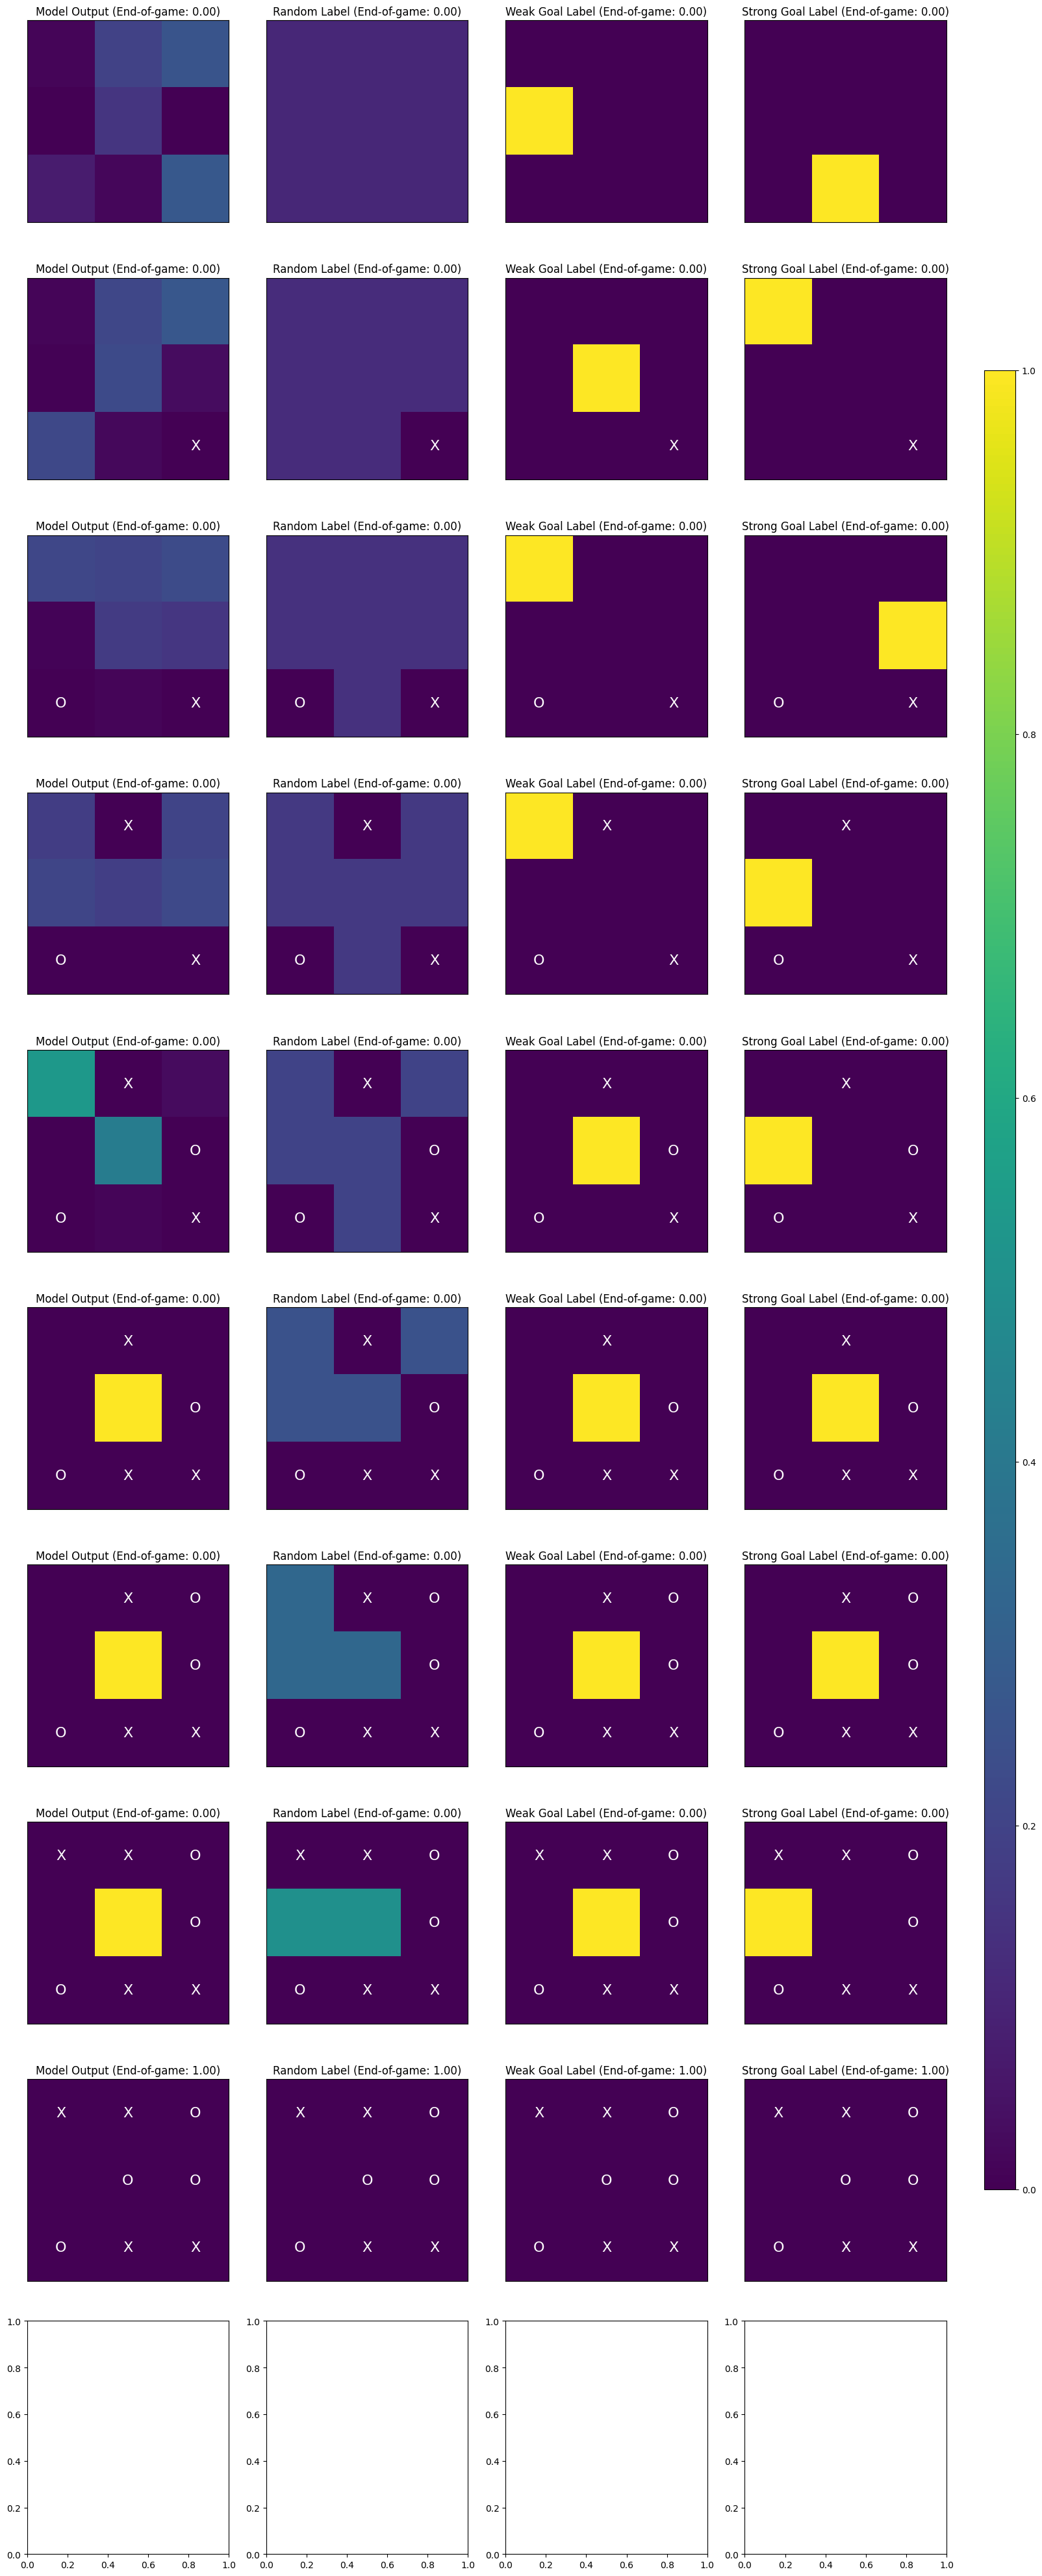

In [ ]:
visualize_game(tictactoe_train_data, game_id=1, model=model)

tensor([10,  8,  5,  3,  0,  1,  2,  4,  6,  7], device='cuda:0')


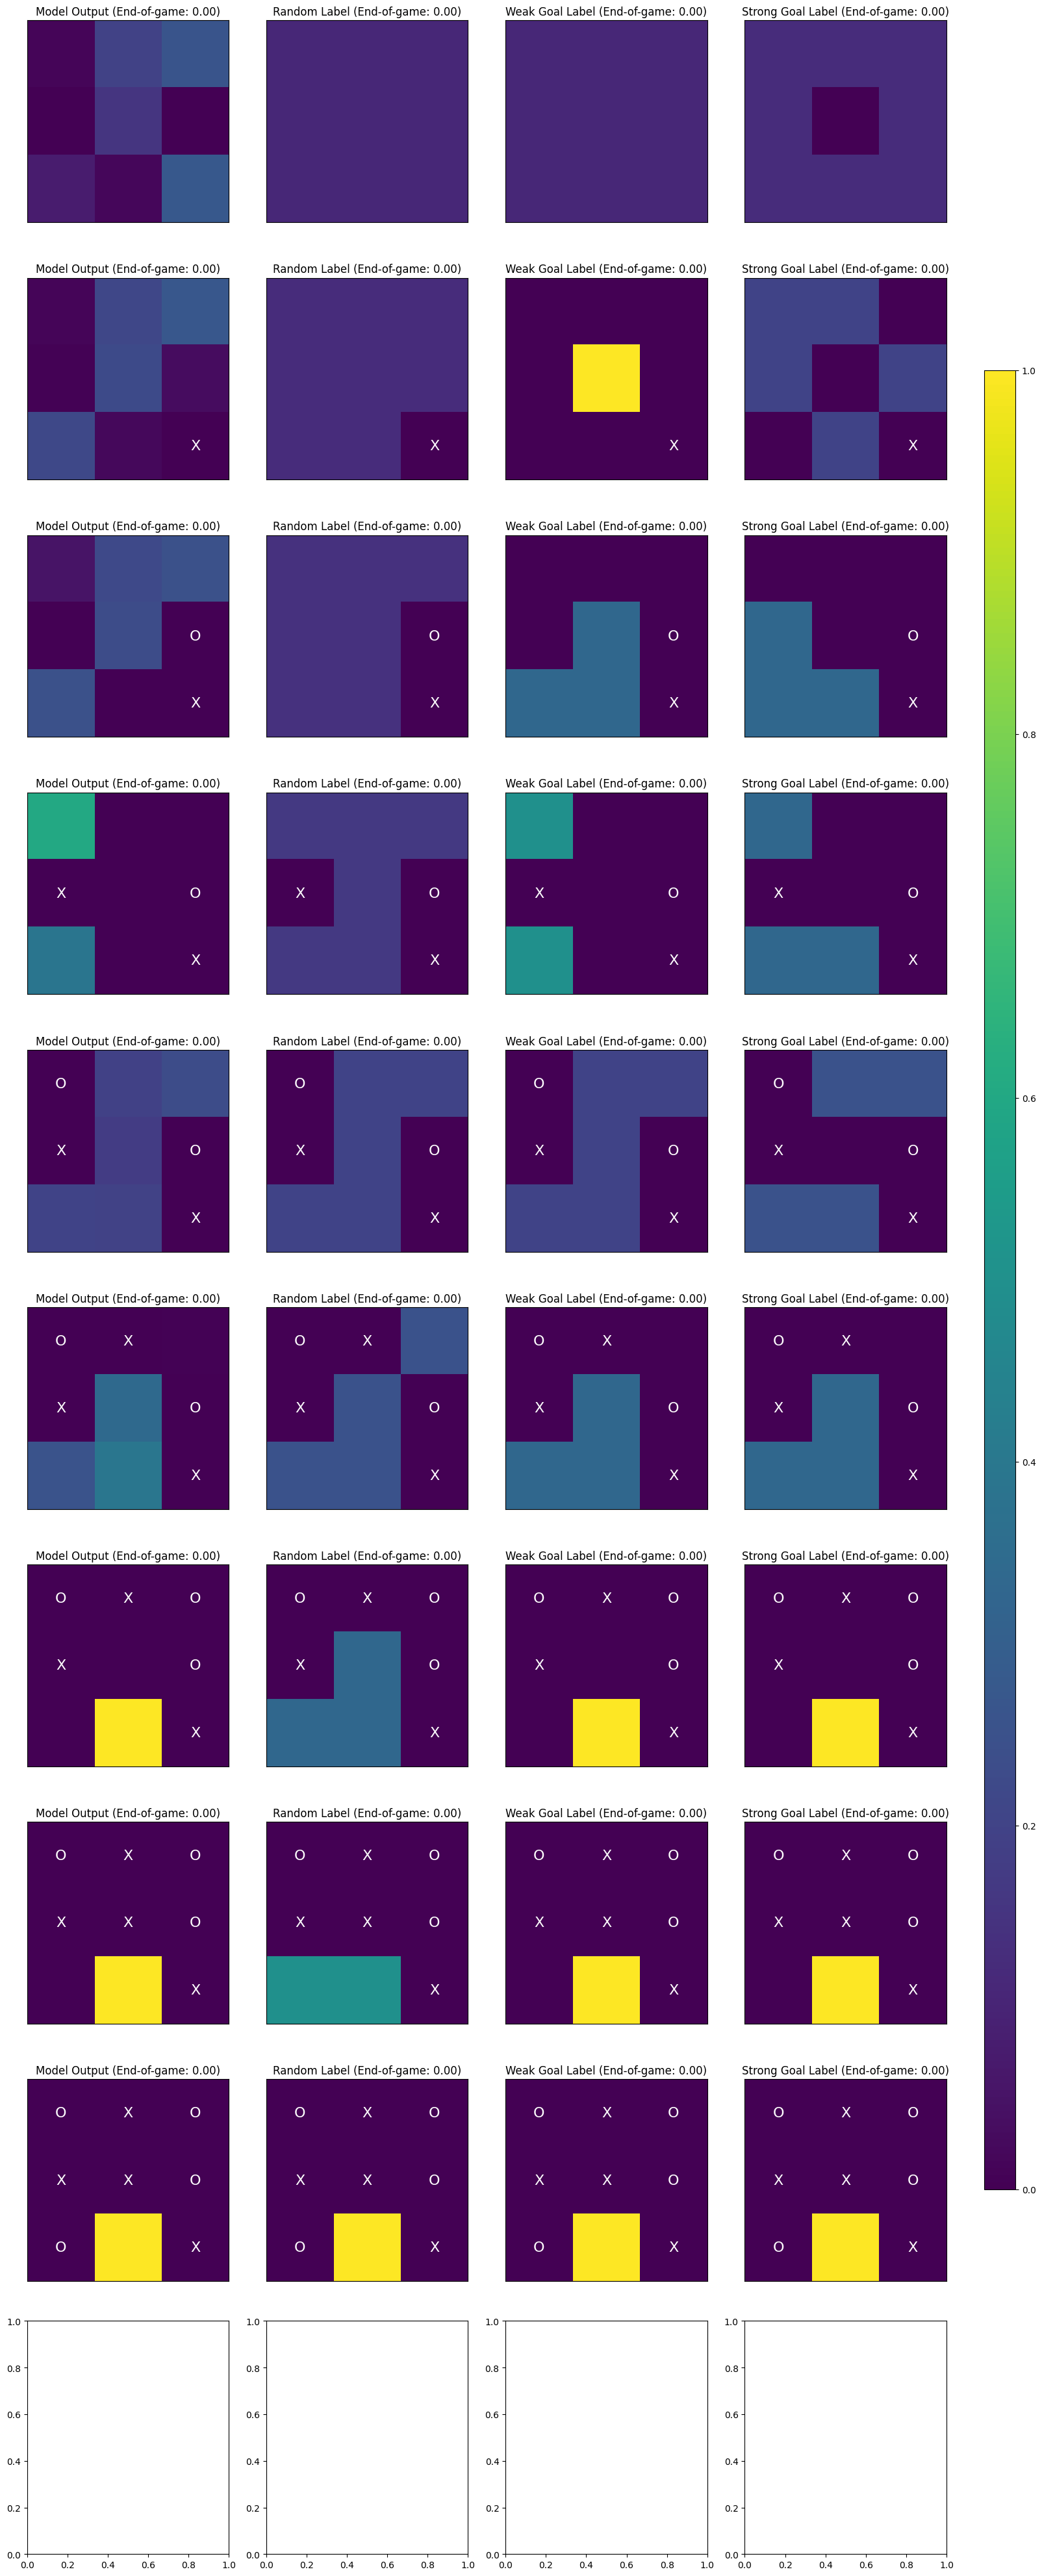

In [ ]:
visualize_game(tictactoe_test_data, game_id=0, model=model)

# Sample games

In [ ]:
samples = sample_games(model, 1, 100)

In [ ]:
eval_model(samples)

{'_check_played_repeat_moves': 0.01,
 '_check_played_after_game_ends': 0.0,
 'inappropriate_end_state': 0.0,
 '_check_if_illegal_moves': 0.01}

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
sample = samples[1]
print(sample)

[10, 7, 0, 3, 5, 8, 4, 1, 6, 2, 9]


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
def check(game: list[int]) -> bool:
    board = Board()
    for move in game[1:-1]:
        print(move)
        if board.game_state == State.ONGOING:
            try:
                board.make_move(move)
            except:
                return True
        elif move == 9:
            pass
        else:
            return True
    return False


check(sample)

7
0
3
5
8
4
1
6
2


False

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
play_game(sample)
print("\nPLAY:")
board = Board()
for move in sample:
    if move not in [9, 10]:
        board.make_move(move)
        board.draw_board()
        print(".")

NameError: name 'play_game' is not defined

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(evals.model_vs_minimax(model, True), "\n")
print(evals._check_minimax_win_rate(model, 100))

NameError: name 'evals' is not defined

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
evals.get_error_rate(samples)

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 